<p style="background-color:#AFB6B2;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;">Digit Recognizor with CNN <span style='font-size:28px; background-color:#AFB6B2 ;'></span></p>


<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/Digit%20recognition.gif?raw=true"></center>

## <p style="background-color:#AFB6B2;color:black;font-size:20px;text-align:center;border-radius:10px 10px;"> Introduction 🔽</p>
<font size="4">The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively. </font>



In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [ ]:
train_df.shape

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'label', data = train_df,palette="Greys")
plt.title('Classes', fontsize = 14)
plt.xlabel('Labels', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 10))

In [ ]:
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)
x_train = X_train/255
test=test_df/255

In [ ]:
import random
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=14)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, x_train.shape[0])
    ax[i].imshow(np.array(x_train.iloc[sample_n]).reshape(28, 28), cmap='Greys')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_train[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

In [ ]:
plt.imshow(np.array(x_train.mean()).reshape(28, 28), cmap='Greys_r')
plt.colorbar()
plt.title('average shape', {'fontsize': 14})
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle('Average shape per digit', fontsize=14)

ax = ax.ravel()

for i in range(10):
    ax[i].imshow(np.array(train_df[train_df['label'] == i].drop('label', axis=1).mean()).reshape(28, 28), cmap='Greys_r')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(i, fontsize = 12)

In [ ]:
x_train_array = np.array(x_train)
test_array = np.array(test)

In [ ]:
x_train_array = x_train_array.reshape(42000, 28, 28, 1)
test_array = test_array.reshape(-1, 28, 28, 1)

In [ ]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="constant",
    
    horizontal_flip=False,
    vertical_flip=False,
    
    rotation_range=20,
    
    validation_split=0.2
)

In [ ]:
datagen.fit(x_train_array)

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)


In [ ]:
warnings.filterwarnings("ignore")
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(BatchNormalization())

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))
cnn1.add(Flatten())

cnn1.add(Dense(512, activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(128, activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(10, activation='softmax'))

In [ ]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = cnn1.fit(datagen.flow(x_train_array, y_train, batch_size=264, subset='training'),
                    epochs=200,
                    validation_data=datagen.flow(x_train_array, y_train,
         batch_size=32, subset='validation'))

In [ ]:
y_test = cnn1.predict(test_array)
y_test = np.array(pd.DataFrame(y_test).idxmax(axis=1))
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, test.shape[0])
    ax[i].imshow(np.array(test_df.iloc[sample_n]).reshape(28, 28), cmap='Greys_r')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_test[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)
fig.show()

In [ ]:
pred = cnn1.predict(x_train_array)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_train=np.argmax(y_train, axis=1)
pred = np.array(pd.DataFrame(pred).idxmax(axis=1))

In [ ]:
print(classification_report(y_train, pred))

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Predicted digits', size=14)
sns.heatmap(confusion_matrix(y_train, pred), cmap='Greys_r', annot=True, fmt = '.0f')
plt.show()

In [ ]:
df_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
df_submission['Label']=y_test
df_submission.to_csv('submission.csv',index=False)

In [ ]:
df_submission.head()

## <p style="background-color:#AFB6B2;color:black;font-size:20px;text-align:center;border-radius:10px 10px;"> Hyperparameter tuning with Kerastuner 🔽</p>

<font size="4">Hyperparameters are the different factors that influence the machine learning model's pace of learning. A model's performance is controlled via hyperparameters. Keras Tuner can help you find the ideal hyperparameter values for your models. The diagram depicts how a Keras tuner works.</font>
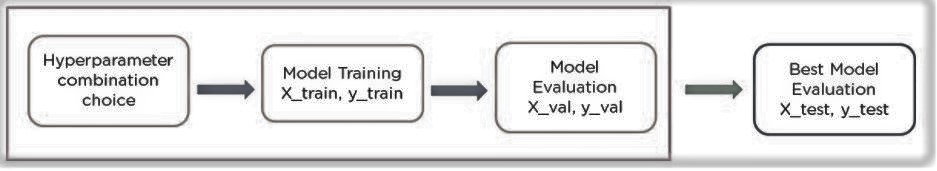

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt

In [ ]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(28,28,1)),
    
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
   
    #keras.layers.Dropout(0.25),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(10, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
#importing random search
from kerastuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 7)
# search best parameter
tuner.search(x_train_array,y_train,epochs=5,validation_split=0.1)

In [ ]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

In [ ]:
model.fit(x_train_array,y_train,
          epochs=100,
          validation_split=0.1,
          initial_epoch=3)

In [ ]:
predt = model.predict(x_train_array)
predt = np.array(pd.DataFrame(predt).idxmax(axis=1))

In [ ]:
print(classification_report(y_train, predt))

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Predicted digits', size=14)
sns.heatmap(confusion_matrix(y_train, predt), cmap='Greys_r', annot=True, fmt = '.0f')
plt.show()

In [ ]:
y_test1 = model.predict(test_array)
y_test1 = np.array(pd.DataFrame(y_test1).idxmax(axis=1))

In [ ]:
df_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
df_submission['Label']=y_test
df_submission.to_csv('submission1.csv',index=False)

<center><p style="color:#AFB9B9;font-size:17px;border:2px solid black;border-radius:12px 10px;text-align:center;">
<b>Highly appreciate your questions or feedback related to this notebook.If you liked this Notebook, please do <span style="color:gold;">upvote</span>. THANK YOU <span style='font-size:22px;'>&#128522;</span></b> </p></center>